<a href="https://colab.research.google.com/github/hgabrali/Exploring-Fashion-MNIST-Building-a-Basic-Neural-Network/blob/main/Exploring_Fashion_MNIST__Building_a_Basic_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring-Fashion-MNIST-Building-a-Basic-Neural-Network

**1. Loading and Understanding the Dataset**

In [21]:
# import
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the Fashion MNIST dataset
(train_data, test_data), ds_info = tfds.load(
    'fashion_mnist',  # Dataset name
    split=['train', 'test'],  # We need training and test splits
    shuffle_files=True,  # Shuffle the dataset to ensure randomness
    as_supervised=True,  # Returns data in the form of (image, label) pairs
    with_info=True  # Load dataset metadata like feature names
)

# Print some basic information
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")

Number of training samples: 60000
Number of test samples: 10000


**2. Visualizing the Data**

* Before building a model, it’s essential to understand the data we’re working with.

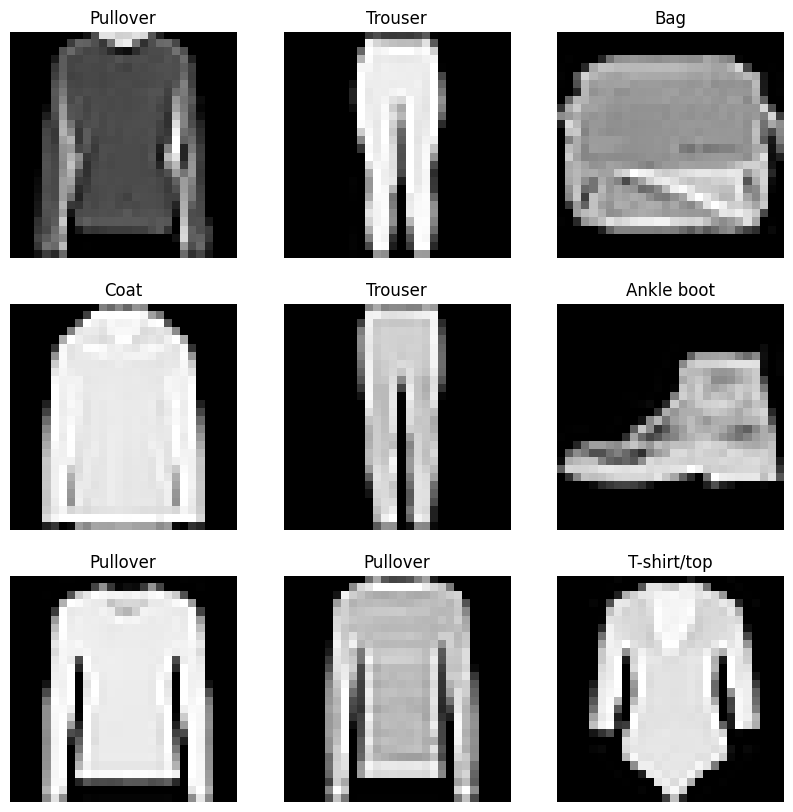

In [22]:
import matplotlib.pyplot as plt

# Prepare a mapping for class labels
class_names = ds_info.features['label'].names

# Function to plot 9 sample images from the training data
def visualize_data(dataset):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(9)):  # Take 9 examples
        image = image.numpy().reshape(28, 28)  # Reshape the image for display
        plt.subplot(3, 3, i+1) # building a grid to display images
        plt.imshow(image, cmap='gray') # showing images
        plt.title(class_names[label.numpy()]) # setting a title
        plt.axis('off')
    plt.show()

# Visualize the training data by calling the function
visualize_data(train_data)

# 🔍 Advanced Data Breakdowns and Diagnostic Visualizations

 Before proceeding to the **Preprocessing (Normalization)** phase, the following diagnostic "breakdowns" (kırılımlar) are rigorously analyzed to identify potential issues or underlying biases within the dataset.

## 🔍 Advanced Data Breakdowns and Diagnostic Visualizations

## ⚖️ 1. Class Distribution Analysis (Label Balance)

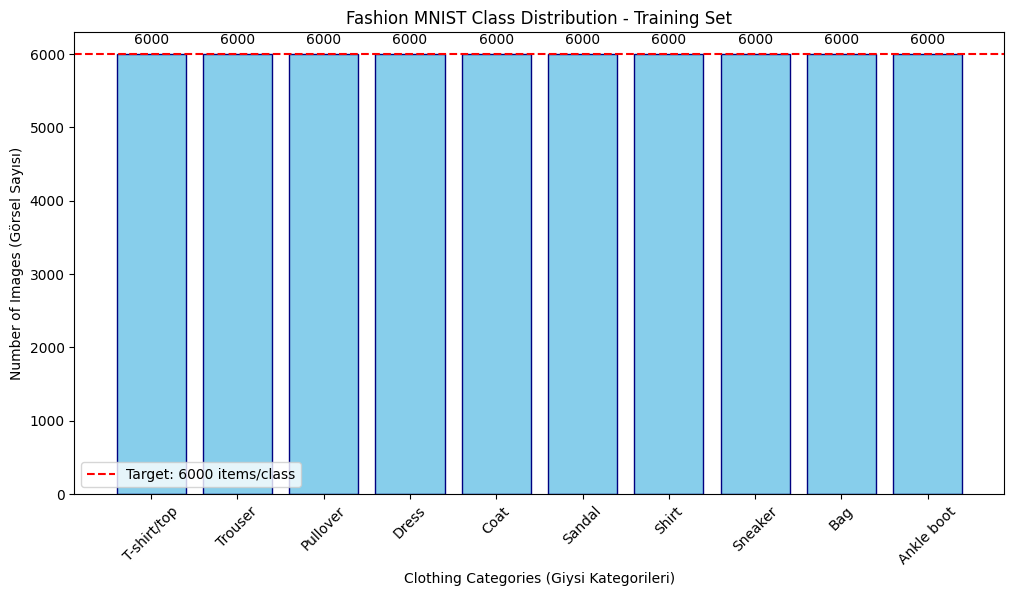

Class 0 (T-shirt/top): 6000 images
Class 1 (Trouser): 6000 images
Class 2 (Pullover): 6000 images
Class 3 (Dress): 6000 images
Class 4 (Coat): 6000 images
Class 5 (Sandal): 6000 images
Class 6 (Shirt): 6000 images
Class 7 (Sneaker): 6000 images
Class 8 (Bag): 6000 images
Class 9 (Ankle boot): 6000 images


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import collections

# ⚖️ 1. Class Distribution Analysis (Label Balance)

# Veri setindeki etiketleri toplamak için bir liste oluşturuyoruz
all_labels = []
for _, label in train_data:
    all_labels.append(label.numpy())

# Her bir etiketin kaç kez geçtiğini sayıyoruz
counts = collections.Counter(all_labels);

# Grafik için verileri hazırlıyoruz
class_indices = list(counts.keys())
sample_counts = list(counts.values())

# Görselleştirme
plt.figure(figsize=(12, 6))
bars = plt.bar(class_names, [counts[i] for i in range(10)], color='skyblue', edgecolor='navy')

# Her barın üzerine tam sayı değerini yazdırıyoruz
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, yval, ha='center', va='bottom')

plt.xlabel('Clothing Categories (Giysi Kategorileri)')
plt.ylabel('Number of Images (Görsel Sayısı)')
plt.title('Fashion MNIST Class Distribution - Training Set')
plt.xticks(rotation=45)
plt.axhline(y=6000, color='red', linestyle='--', label='Target: 6000 items/class') # Hedef çizgi
plt.legend()
plt.show()

# Konsol çıktısı olarak kontrol
for i, name in enumerate(class_names):
    print(f"Class {i} ({name}): {counts[i]} images")

## 📈 2. Pixel Intensity Distribution (Histogram Analysis)

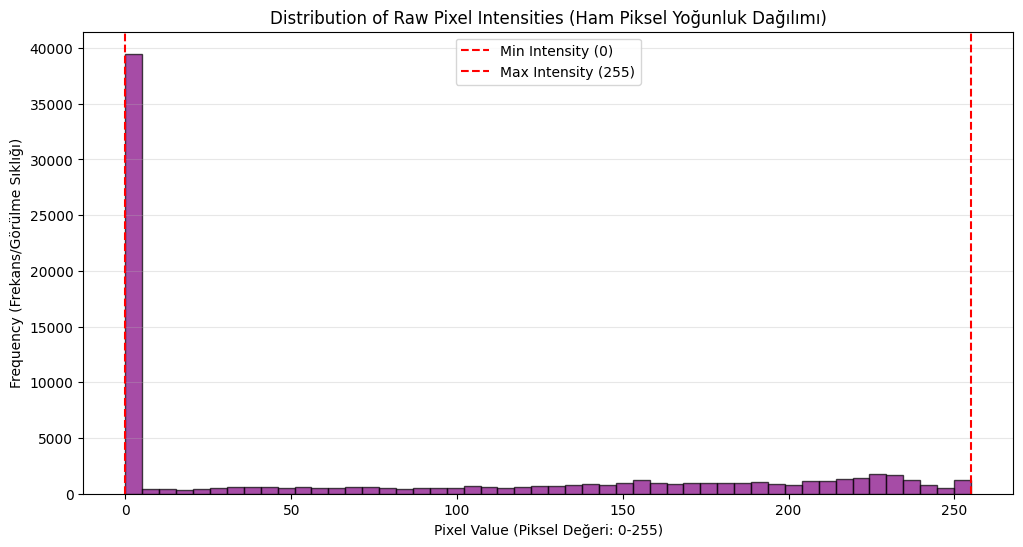

Minimum Pixel Value (Minimum Piksel Değeri): 0
Maximum Pixel Value (Maximum Piksel Değeri): 255
Average Pixel Value (Ortalama Piksel Değeri): 76.17


In [24]:

# Eğitim setinden birkaç örnek görüntü alıp piksellerini düzleştiriyoruz (flattening)
# Analiz için ilk 100 görüntüyü örneklem olarak kullanıyoruz
sample_images = []
for image, label in train_data.take(100):
    sample_images.append(image.numpy().flatten())

# Tüm piksel değerlerini tek bir büyük dizi (array) haline getiriyoruz
all_pixels = np.concatenate(sample_images)

# Histogram Görselleştirme
plt.figure(figsize=(12, 6))
plt.hist(all_pixels, bins=50, color='purple', edgecolor='black', alpha=0.7)

# Grafik Detayları
plt.title('Distribution of Raw Pixel Intensities (Ham Piksel Yoğunluk Dağılımı)')
plt.xlabel('Pixel Value (Piksel Değeri: 0-255)')
plt.ylabel('Frequency (Frekans/Görülme Sıklığı)')
plt.grid(axis='y', alpha=0.3)

# 0 ve 255 sınırlarını vurgulamak için dikey çizgiler
plt.axvline(x=0, color='red', linestyle='--', label='Min Intensity (0)')
plt.axvline(x=255, color='red', linestyle='--', label='Max Intensity (255)')
plt.legend()

plt.show()

# İstatistiksel Özet
print(f"Minimum Pixel Value (Minimum Piksel Değeri): {np.min(all_pixels)}")
print(f"Maximum Pixel Value (Maximum Piksel Değeri): {np.max(all_pixels)}")
print(f"Average Pixel Value (Ortalama Piksel Değeri): {np.mean(all_pixels):.2f}")

## 🌫️ 3. Class-Averaged "Mean" Images

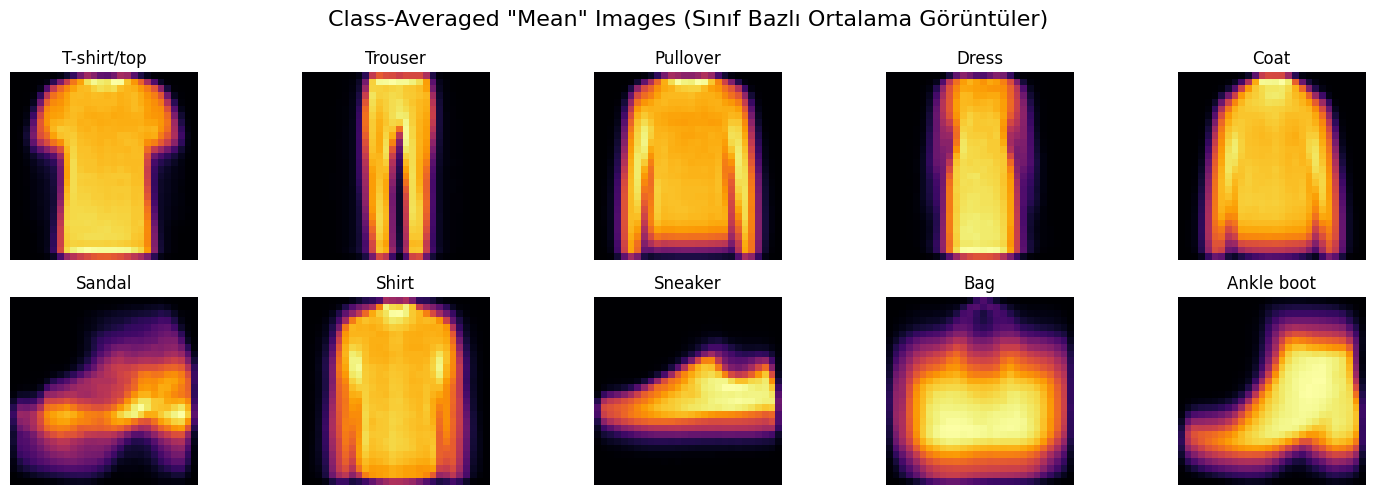

In [25]:


# Her sınıf için görüntüleri biriktirmek üzere bir sözlük (dictionary) oluşturuyoruz
class_images = {i: [] for i in range(10)}

# Eğitim setindeki görüntüleri sınıflarına göre gruplandırıyoruz
# Not: Hız için ilk 10.000 örneği kullanabilir veya tüm seti (ds_train) dönebilirsiniz
for image, label in train_data.take(10000):
    class_images[label.numpy()].append(image.numpy())

# Ortalama görüntüleri hesaplama ve görselleştirme
plt.figure(figsize=(15, 5))
plt.suptitle('Class-Averaged "Mean" Images (Sınıf Bazlı Ortalama Görüntüler)', fontsize=16)

for i in range(10):
    # İlgili sınıfa ait tüm görüntülerin ortalamasını alıyoruz
    mean_img = np.mean(class_images[i], axis=0).reshape(28, 28)

    plt.subplot(2, 5, i + 1)
    plt.imshow(mean_img, cmap='inferno') # 'inferno' ısı haritası yoğunluğu daha iyi gösterir
    plt.title(f"{class_names[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 📉 4. Variance and Noise Detection

* Bu analiz, her bir giysi kategorisi içindeki piksellerin ne kadar değişkenlik gösterdiğini anlamamızı sağlar.

*Ortalama görüntü (mean image) bize "genel şekli" verirken, standart sapma (standard deviation) görüntüsü hangi bölgelerin "gürültülü" veya "hareketli" olduğunu gösterir.

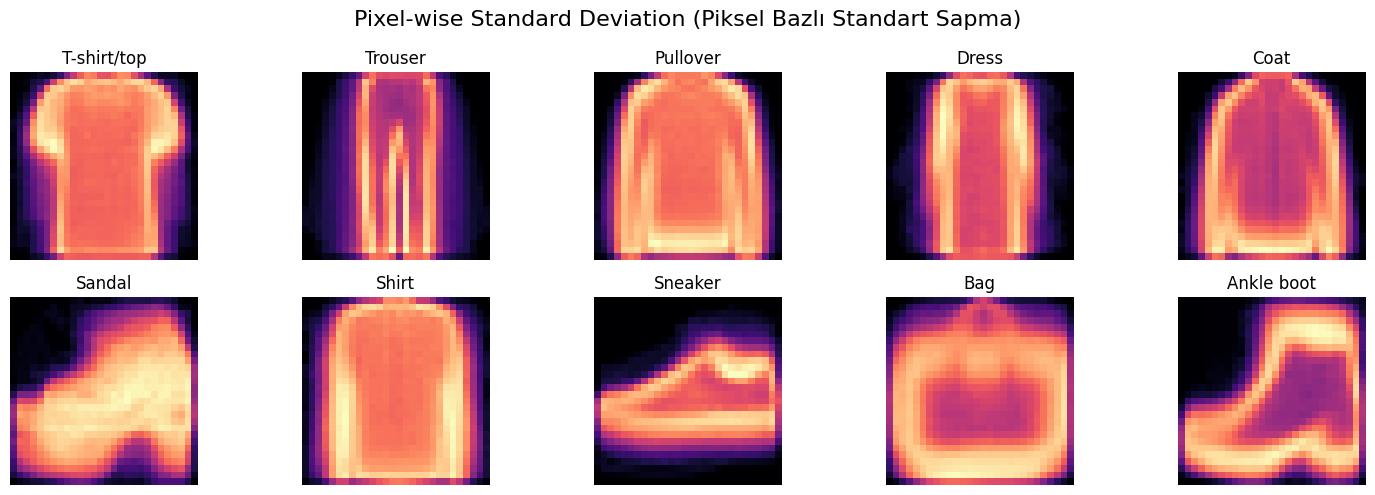

In [26]:

# Her sınıf için standart sapma (standard deviation) hesaplıyoruz
plt.figure(figsize=(15, 5))
plt.suptitle('Pixel-wise Standard Deviation (Piksel Bazlı Standart Sapma)', fontsize=16)

for i in range(10):
    # İlgili sınıfa ait görüntülerin standart sapmasını hesaplıyoruz
    # Formül: sigma = sqrt(mean(abs(x - x.mean())**2))
    std_img = np.std(class_images[i], axis=0).reshape(28, 28)

    plt.subplot(2, 5, i + 1)
    # 'magma' veya 'hot' paleti yüksek varyanslı bölgeleri daha iyi vurgular
    plt.imshow(std_img, cmap='magma')
    plt.title(f"{class_names[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**3. Preprocessing the Data**

* We scaled the pixel values from their original range (0 to 255) down to [0, 1].

* We did this by creating a function called normalize_img and then applied this function via mapping to both training and testing portions of data.

In [27]:
# Normalize images to [0, 1] range
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Scale the pixel values
    return image, label

# Apply normalization to both train and test sets
train_data = train_data.map(normalize_img)
test_data = test_data.map(normalize_img)

**4. Building a Basic Neural Network**

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 🏗️ Building a Basic Neural Network (Temel Sinir Ağının İnşası)

model = models.Sequential([
    # 1. Input & Flattening Layer (Giriş ve Düzleştirme Katmanı)
    # 28x28 boyutundaki 2D görüntüyü 784 piksellik 1D vektöre dönüştürür.
    layers.Flatten(input_shape=(28, 28, 1)),

    # 2. Hidden (Dense) Layer (Gizli/Yoğun Katman)
    # Verideki karmaşık desenleri öğrenmek için 128 nöron ve ReLU aktivasyonu kullanılır.
    layers.Dense(128, activation='relu'),

    # 3. Output Layer (Çıktı Katmanı)
    # 10 farklı sınıf için 10 nöron içerir.
    # Multiclass classification (Çok sınıflı sınıflandırma) için Softmax kullanılır.
    layers.Dense(10, activation='softmax')
])

# Modeli derleme (Compiling the Model)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model özetini görüntüleme
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

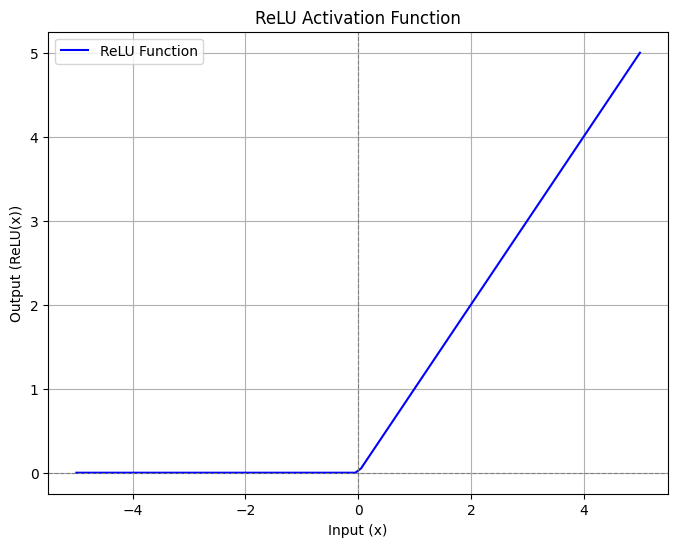

In [29]:

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Generate a range of input values
x = np.linspace(-5, 5, 100)

# Calculate the corresponding ReLU output values
y = relu(x)

# Plot the ReLU function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ReLU Function', color='blue')
plt.title('ReLU Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (ReLU(x))')
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()

In [30]:

# Build the neural network model
model = models.Sequential([
		# Flatten 28x28 images into 1D vectors
    layers.Flatten(input_shape=(28, 28)),
    # First fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),
    # Output layer with 10 neurons (one per class)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',  # Optimization algorithm
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

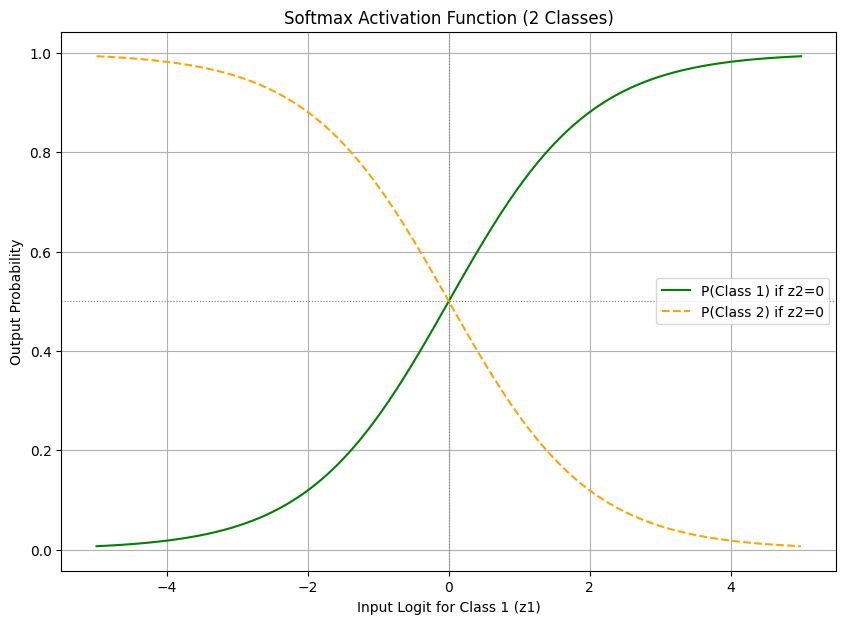

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Softmax activation function for a 2-element vector
def softmax(z):
    # Ensure z is a numpy array for element-wise operations
    z = np.array(z)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z)

# Generate a range of input values for z1
z1_values = np.linspace(-5, 5, 100)

# Fix z2 to a constant value (e.g., 0) to observe relative changes
z2_fixed = 0

# Calculate Softmax probabilities for each z1 value
p1_values = []
p2_values = []

for z1 in z1_values:
    # Create a logit vector [z1, z2_fixed]
    probs = softmax([z1, z2_fixed])
    p1_values.append(probs[0])
    p2_values.append(probs[1])

# Plot the Softmax function for two classes
plt.figure(figsize=(10, 7))
plt.plot(z1_values, p1_values, label='P(Class 1) if z2=0', color='green')
plt.plot(z1_values, p2_values, label='P(Class 2) if z2=0', color='orange', linestyle='--')

plt.title('Softmax Activation Function (2 Classes)')
plt.xlabel('Input Logit for Class 1 (z1)')
plt.ylabel('Output Probability')
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle=':', linewidth=0.8)
plt.axvline(0, color='gray', linestyle=':', linewidth=0.8)
plt.legend()
plt.show()

**5. Training the Model**

* Now that our model is built and compiled, we can train it on the dataset. We'll use the training data to fit the model and validate it on the test set.

In [32]:
# Batch the data for better performance during training
train_data = train_data.batch(32)
test_data = test_data.batch(32)

# Train the model for 10 epochs
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10  # Train for 10 passes through the dataset
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7852 - loss: 0.6150 - val_accuracy: 0.8383 - val_loss: 0.4460
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8616 - loss: 0.3874 - val_accuracy: 0.8548 - val_loss: 0.4006
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8756 - loss: 0.3426 - val_accuracy: 0.8646 - val_loss: 0.3684
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8841 - loss: 0.3157 - val_accuracy: 0.8713 - val_loss: 0.3556
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8922 - loss: 0.2949 - val_accuracy: 0.8758 - val_loss: 0.3475
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8977 - loss: 0.2790 - val_accuracy: 0.8769 - val_loss: 0.3419
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9037 - loss: 0.2645 - val_accuracy: 0.8801 - val_loss: 0.3383
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9072 - loss: 0

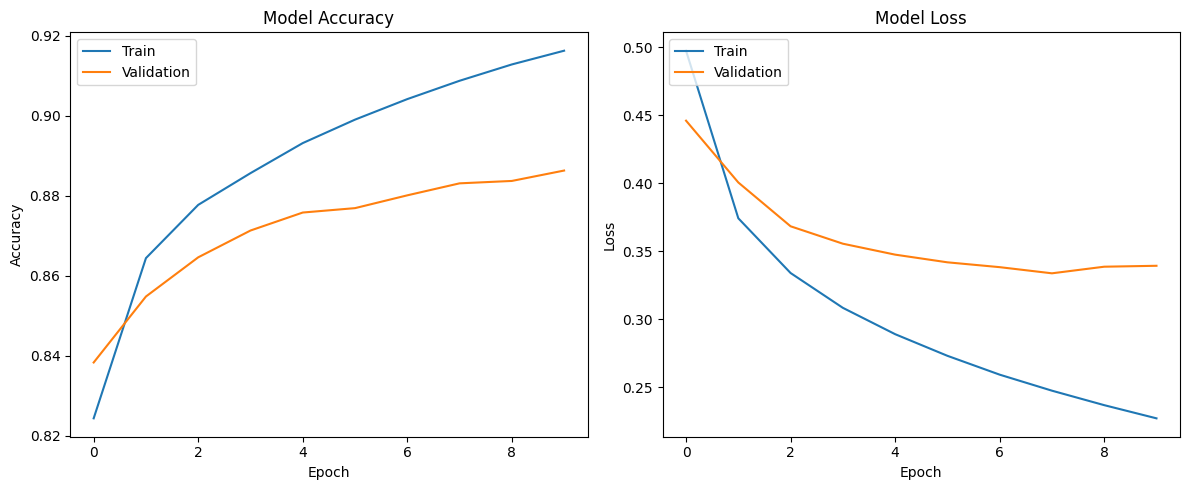

In [33]:


# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**6. Evaluating the Model**

In [34]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8863 - loss: 0.3330
Test accuracy: 88.63%


**evaluate:** This function computes the loss and accuracy on the test dataset. The accuracy shows how well our model performs on unseen images.

**🧪 Model Evaluation & Performance Analysis Code**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8863 - loss: 0.3330

Test Accuracy (Test Doğruluğu): 88.63%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


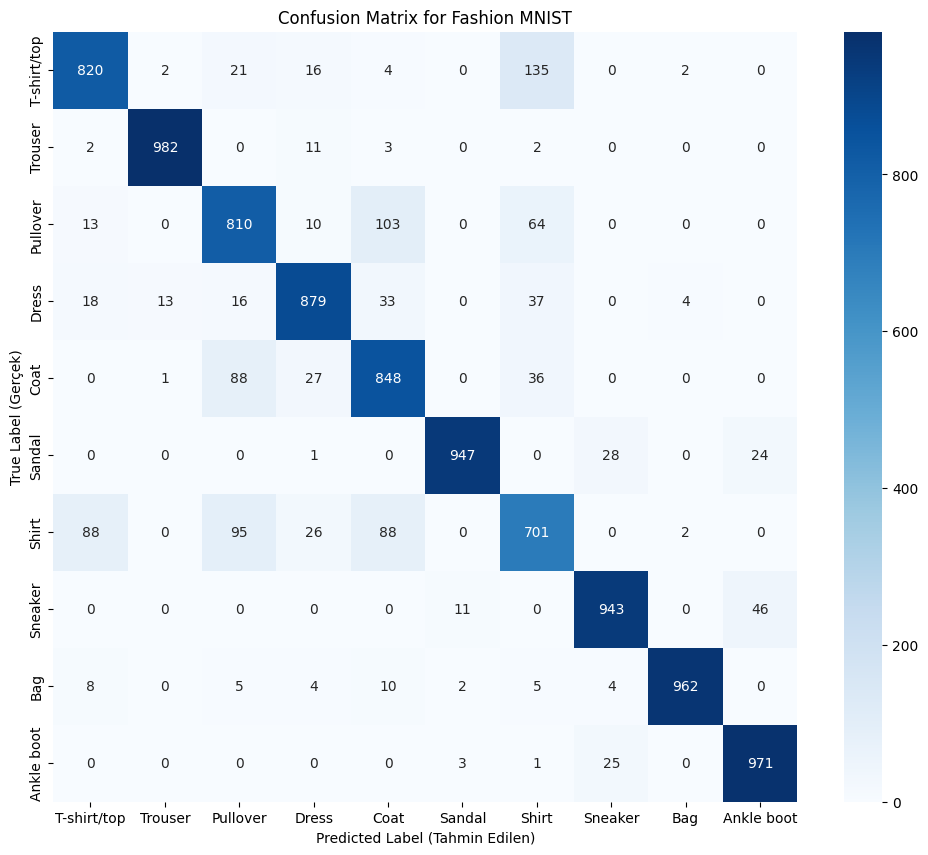

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Basic Evaluation (Temel Değerlendirme)
# Test seti üzerinde kayıp (loss) ve doğruluk (accuracy) değerlerini hesaplar.
test_loss, test_acc = model.evaluate(test_data)
print(f'\nTest Accuracy (Test Doğruluğu): {test_acc*100:.2f}%')

# 2. Confusion Matrix (Karmaşıklık Matrisi)
# Modelin hangi sınıfları birbiriyle karıştırdığını görselleştirir.
y_pred = []
y_true = []

# To get true labels and predictions for the confusion matrix, we need to iterate over the test_data
# and get the actual images and labels
# We will collect all images and labels first, then make predictions
all_test_images = []
all_test_labels = []

for images, labels in test_data.unbatch(): # unbatch to get individual images
    all_test_images.append(images.numpy())
    all_test_labels.append(labels.numpy())

all_test_images = np.array(all_test_images)
all_test_labels = np.array(all_test_labels)

predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = all_test_labels

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label (Tahmin Edilen)')
plt.ylabel('True Label (Gerçek)')
plt.title('Confusion Matrix for Fashion MNIST')
plt.show()

# 3. Visualizing Predictions (Tahminlerin Görselleştirilmesi)
# Modelin doğru ve yanlış bildiği örnekleri yan yana görelim.
def plot_prediction(images, labels, predictions, index):
    plt.imshow(images[index].reshape(28,28), cmap='gray')
    pred_label = class_names[np.argmax(predictions[index])]
    true_label = class_names[labels[index]]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')

# Rastgele bir batch alıp görselleştirme yapabilirsin